# Benchmark, No Denoising vs. PCA Denoising vs. RPCA Denoising
### Discriminibility Setting:
  * 4 Subjects
  * 11, 11, 11, and 9 trials.
  * Metric: Frobenius Norm
  * Data derivitive on which metric is computed: Correlation Matrix
  * Hard-Coded parameters: maximum of 10 iterations on RPCA

In [1]:
import pickle as pkl
from auto_bench.results import (bench_report,
                                compare_results,
                                crossval_plot)
from auto_bench.main import metric_test, best_param_combo

In [2]:
# Load Default No Denoise Data
exp_dir = 'default_no_denoise/'
with open('results/' + exp_dir + 'default_no_denoise_param_map.pkl', 'r') as f:
    pmap_no = pkl.load(f)
with open('results/' + exp_dir + 'default_no_denoise.pkl', 'r') as f:
    R_no = pkl.load(f)
with open('results/' + exp_dir + 'opti_crossval.pkl', 'r') as f:
    res_no = pkl.load(f)

# Load PCA Denoise Data
exp_dir = 'pca_denoise/'
with open('results/' + exp_dir + 'pca_denoise_param_map.pkl', 'r') as f:
    pmap_pca = pkl.load(f)
with open('results/' + exp_dir + 'pca_denoise.pkl', 'r') as f:
    R_pca = pkl.load(f)
with open('results/' + exp_dir + 'opti_crossval.pkl', 'r') as f:
    res_pca = pkl.load(f)

# Load RPCA Denoise Data
exp_dir = 'rpca_denoise/'
with open('results/' + exp_dir + 'rpca_denoise_param_map.pkl', 'r') as f:
    pmap_rpca = pkl.load(f)
with open('results/' + exp_dir + 'rpca_denoise.pkl', 'r') as f:
    R_rpca = pkl.load(f)
with open('results/' + exp_dir + 'opti_crossval.pkl', 'r') as f:
    res_rpca = pkl.load(f)

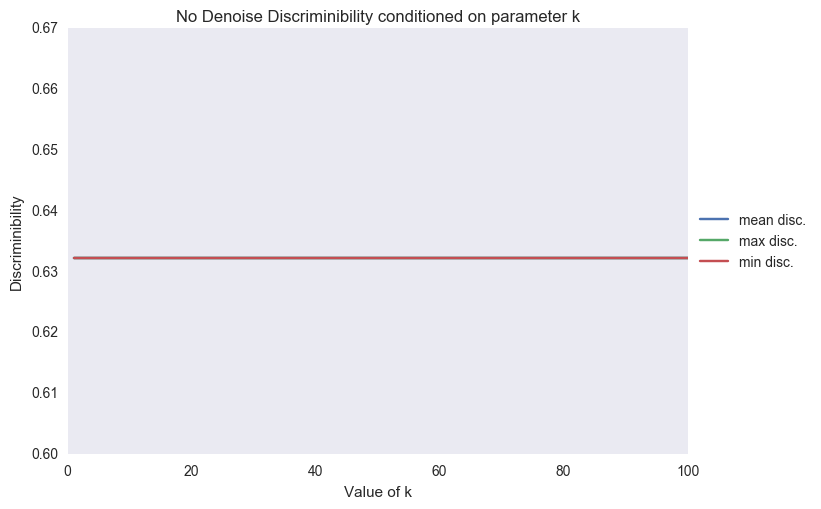

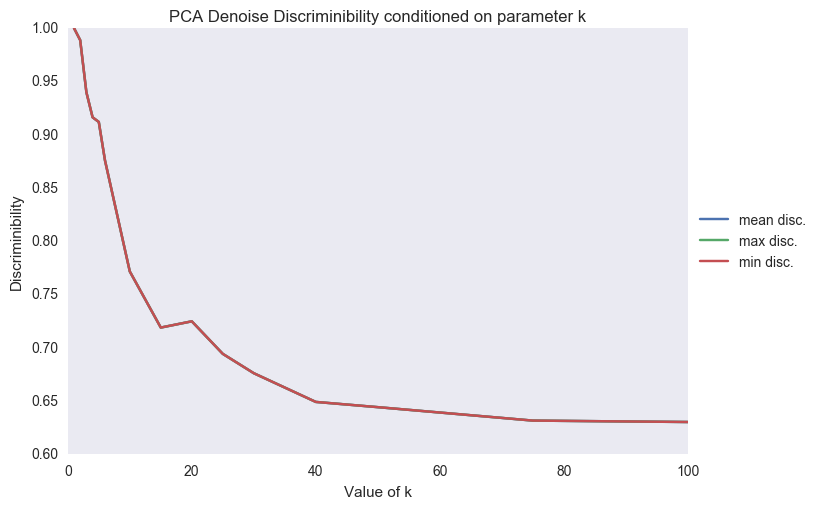

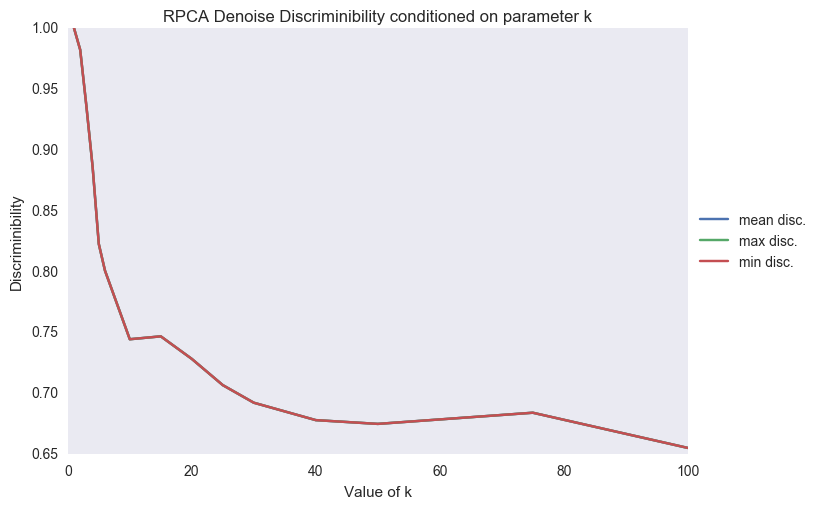

In [3]:
bench_report(R_no, pmap_no, 'No Denoise', 'Frob. Correlation Metric')
bench_report(R_pca, pmap_pca, 'PCA Denoise', 'Frob. Correlation Metric')
bench_report(R_rpca, pmap_rpca, 'RPCA Denoise', 'Frob. Correlation Metric')

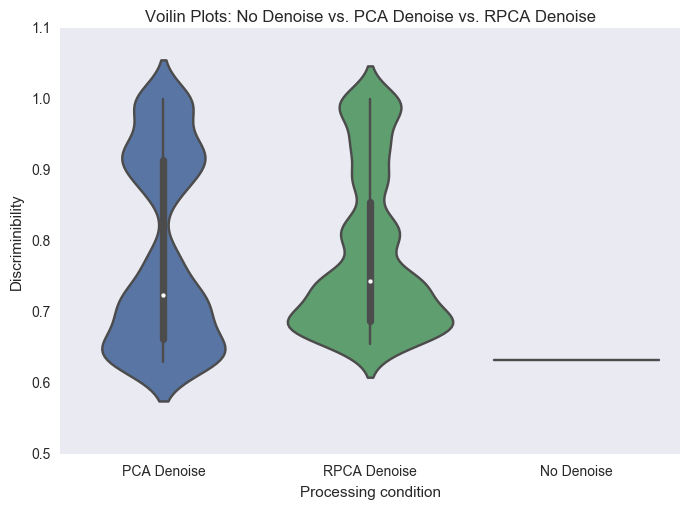

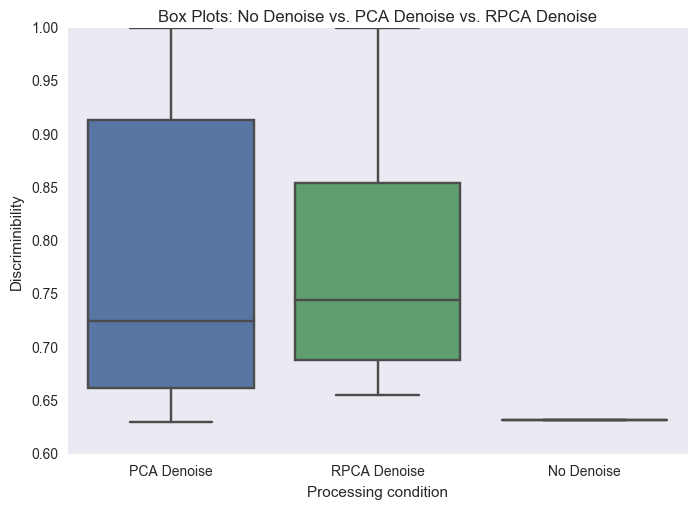

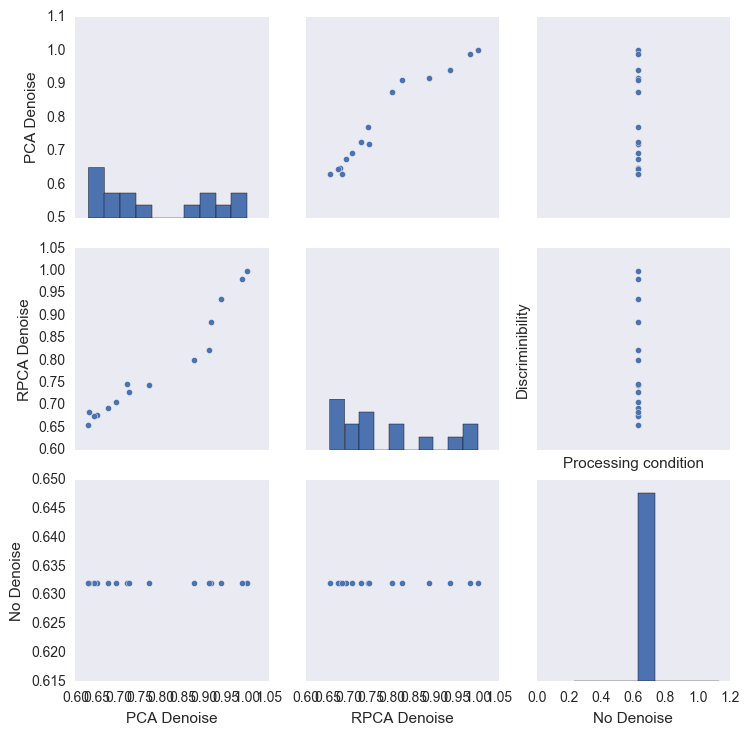

In [4]:
compare_results([(R_pca, 'PCA Denoise'), (R_rpca, 'RPCA Denoise'), (R_no, 'No Denoise')],
                'No Denoise vs. PCA Denoise vs. RPCA Denoise')

PCA best param setting: {'k': 1}  with a discriminibility of 1.0
RPCA best param setting: {'k': 1}  with a discriminibility of 1.0


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


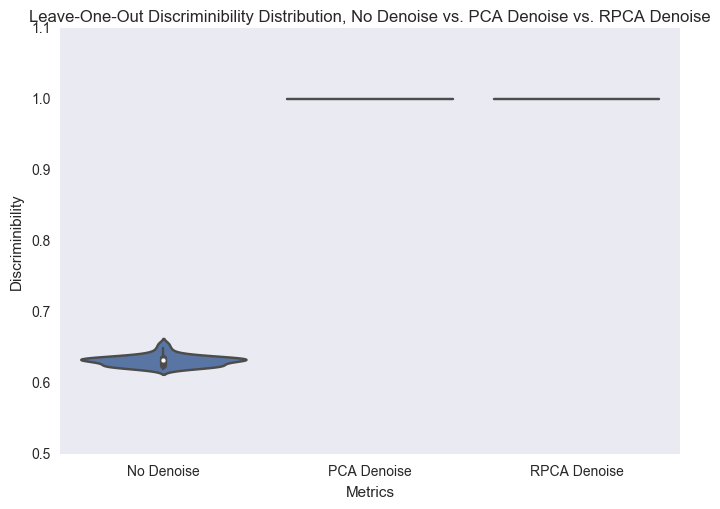

In [5]:
print 'PCA best param setting:', res_pca[1], ' with a discriminibility of', R_pca[res_pca[2]]
print 'RPCA best param setting:', res_rpca[1], ' with a discriminibility of', R_rpca[res_rpca[2]]
crossval_plot([res_no[0], res_pca[0], res_rpca[0]],
              names=['No Denoise', 'PCA Denoise', 'RPCA Denoise'],
              title='Leave-One-Out Discriminibility Distribution, No Denoise vs. PCA Denoise vs. RPCA Denoise')